In this, we already assume that all the features are independent of each other, just for the simplicity purpose

Used in email spam detection, character recognition, weather prediction, face detection and news article recognition


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [2]:
df = pd.read_csv('../Datasets/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [195]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [196]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [197]:
k = pd.get_dummies(df.Sex)
k

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [198]:
df = pd.concat([df,k],axis=1)
df.drop(['Sex','female'],axis=1,inplace=True)
df.head()

,Pclass,Age,Fare,Survived,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


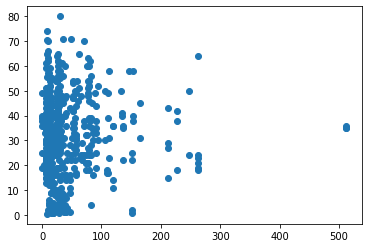

In [199]:
plt.scatter(df['Fare'],df['Age'])

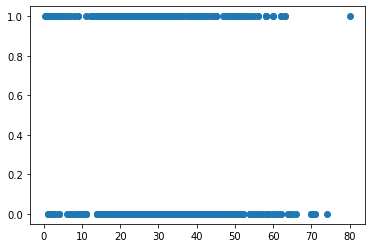

In [200]:
plt.scatter(df['Age'],df['Survived'])

In [201]:
df.describe()
## clearly there are outliers in the data

,Pclass,Age,Fare,Survived,male
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838,0.647587
std,0.836071,14.526497,49.693429,0.486592,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,1.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


In [202]:
df.isna().sum()
## sum col has 177 NA values

Pclass        0
Age         177
Fare          0
Survived      0
male          0
dtype: int64

In [203]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [204]:
## lets use minmax scaler on the Age and fare

from sklearn.preprocessing import MinMaxScaler
k = MinMaxScaler()
k.fit(df[['Age']])
df['Age'] = k.transform(df[['Age']])

k.fit(df[['Fare']])
df['Fare'] = k.transform(df[['Fare']])
df.head()


,Pclass,Age,Fare,Survived,male
0,3,0.271174,0.014151,0,1
1,1,0.472229,0.139136,1,0
2,3,0.321438,0.015469,1,0
3,1,0.434531,0.103644,1,0
4,3,0.434531,0.015713,0,1


In [205]:
df.isna().sum()

Pclass      0
Age         0
Fare        0
Survived    0
male        0
dtype: int64

In [206]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [208]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [209]:
model.score(X_test,y_test)

0.7932960893854749

In [210]:
## lets manually run the model on 10 data on xtest
k = X_test[:10]

In [211]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [212]:
model.predict_proba(X_test[:10])

array([[0.96154317, 0.03845683],
       [0.75597345, 0.24402655],
       [0.9541366 , 0.0458634 ],
       [0.95689775, 0.04310225],
       [0.0261659 , 0.9738341 ],
       [0.78147761, 0.21852239],
       [0.90352081, 0.09647919],
       [0.96456586, 0.03543414],
       [0.68411123, 0.31588877],
       [0.95875032, 0.04124968]])

## lets see the same using Cross Validation

In [214]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train,y_train,cv=6)

array([0.81512605, 0.78991597, 0.76470588, 0.78151261, 0.73728814,
       0.75423729])